## Dataset Overview

1. Customer
- CustomerID : No Unik Customer
- Age : Usia Customer
- Gender : 0 Wanita, 1 Pria
- Marital Status : Married, Single (Blm menikah/Pernah menikah)
- Income : Pendapatan per bulan dalam jutaan rupiah

2. Store
- StoreID : Kode Unik Store
- StoreName : Nama Toko
- GroupStore : Nama group
- Type : Modern Trade, General Trade
- Latitude : Kode Latitude
- Longitude : Kode Longitude

3. Product
- ProductID : Kode Unik Product
- Product Name : Nama Product
- Price : Harga dlm rupiah

4. Transaction
- TransactionID : Kode Unik Transaksi
- Date : Tanggal transaksi
- Qty : Jumlah item yang dibeli
- Total Amount : Price x Qty

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [47]:
# load dataset
customer = pd.read_csv(r'D:\Rakamin Data Science\Project Based Internship (PBI)\Kalbe Nutritionals - Data Scientist\Final Task\Case Study - Customer.csv', sep =';')
product = pd.read_csv(r'D:\Rakamin Data Science\Project Based Internship (PBI)\Kalbe Nutritionals - Data Scientist\Final Task\Case Study - Product.csv', sep =';')
store = pd.read_csv(r'D:\Rakamin Data Science\Project Based Internship (PBI)\Kalbe Nutritionals - Data Scientist\Final Task\Case Study - Store.csv', sep =';')
transaction = pd.read_csv(r'D:\Rakamin Data Science\Project Based Internship (PBI)\Kalbe Nutritionals - Data Scientist\Final Task\Case Study - Transaction.csv', sep =';')

In [74]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [72]:
product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [71]:
store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845
5,6,Lingga,Lingga,Modern Trade,-5.135399,119.423790
6,7,Buana Indah,Buana,General Trade,3.316694,114.590111
7,8,Sinar Harapan,Harapan Baru,General Trade,5.548290,95.323753
8,9,Lingga,Lingga,Modern Trade,-3.654703,128.190643
9,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513


In [51]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


## Data Cleansing

### Change Values

In [75]:
# change StoreName values based on Latitude and Longitude
store.at[5,'StoreName'] = 'Lingga 1'
store.at[8,'StoreName'] = 'Lingga 2'
store.at[7, 'StoreName'] = 'Sinar Harapan 1'
store.at[10, 'StoreName'] = 'Sinar Harapan 2'

### Check & Handle Data Type

In [52]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [53]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [54]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [55]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


- Kolom `Income` pada dataset Customer akan diubah tipe datanya dari object menjadi float.
- Kolom `Latitude` dan `Longitude` pada dataset Store akan diubah tipe datanya dari object menjadi float.
- Kolom `Date` pada dataset Transaction akan diubah tipe datanya dari object menjadi datetime.

In [56]:
# change data type
customer['Income'] = customer['Income'].str.replace(',', '.').astype(float)
store['Latitude'] = store['Latitude'].str.replace(',', '.').astype(float)
store['Longitude'] = store['Longitude'].str.replace(',', '.').astype(float)

In [57]:
from datetime import datetime
transaction['Date'] = pd.to_datetime(transaction['Date'],format='%d/%m/%Y')

## Check Duplicate Date

In [18]:
print('Duplicated rows:', customer.duplicated().sum())

Duplicated rows: 0


In [19]:
print('Duplicated rows:', product.duplicated().sum())

Duplicated rows: 0


In [20]:
print('Duplicated rows:', store.duplicated().sum())

Duplicated rows: 0


In [21]:
print('Duplicated rows:', transaction.duplicated().sum())

Duplicated rows: 0


- Tidak ada data duplikat pada keempat dataset.

## Check & Handle Missing Value

In [62]:
customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [63]:
product.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [64]:
store.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [65]:
transaction.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

- Terdapat 3 missing value pada kolom `Marital Status` di dataset Customer.
- Mengisi missing value dengan nilai modus.

In [66]:
# fill missing values with mode
customer['Marital Status'] = customer['Marital Status'].fillna(customer['Marital Status'].mode()[0])
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

## Merge All Dataset

In [81]:
df_merge = pd.merge(transaction, product, on='ProductID', how='left')
df_merge = pd.merge(df_merge, store, on='StoreID', how='left')
df_merge = pd.merge(df_merge, customer, on='CustomerID', how='left')

In [82]:
df_merge.sample(3)

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
2647,TR46056,247,2022-07-08,P6,18000,2,36000,8,Cashew,18000,Sinar Harapan 1,Harapan Baru,General Trade,5.548290,95.323753,33,1,Married,8.11
1802,TR59996,26,2022-05-09,P1,8800,2,17600,3,Choco Bar,8800,Prima Kota,Prima,Modern Trade,-7.797068,110.370529,45,1,Married,7.83
1473,TR24634,124,2022-04-15,P3,7500,2,15000,6,Crackers,7500,Lingga 1,Lingga,Modern Trade,-5.135399,119.423790,28,0,Single,5.12


In [80]:
df_merge.shape

(5020, 19)

## Regression

ARIMA Machine Learning: Predict the quantity of total daily sold products

In [87]:
df_reg = df_merge.groupby('Date').agg({'Qty':'sum'})
df_reg

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


<Axes: xlabel='Date'>

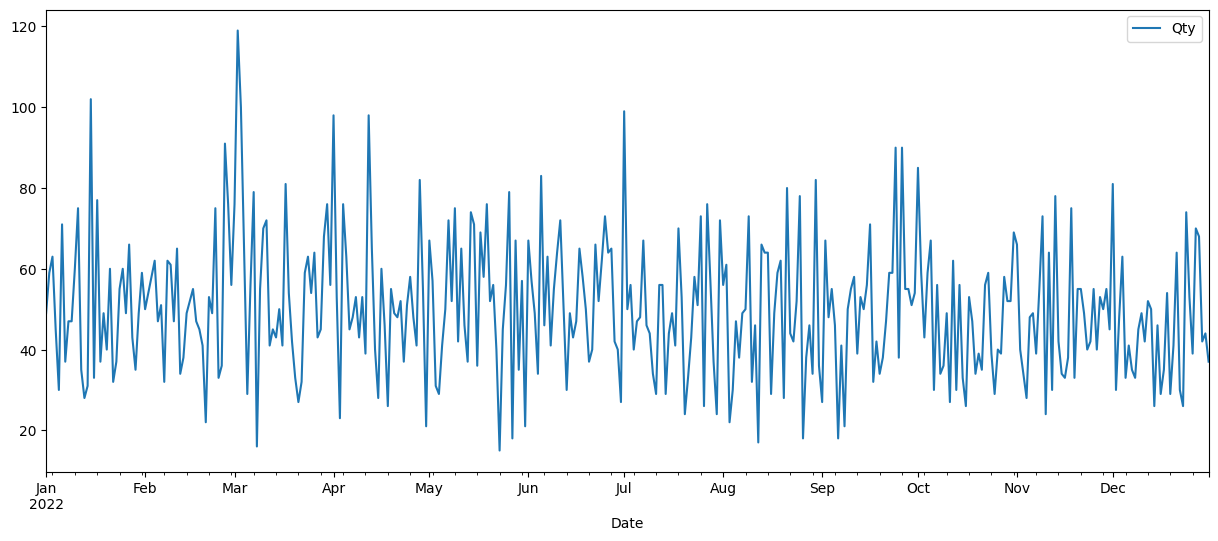

In [91]:
# Visualize Data
df_reg.plot(figsize=(15,6))

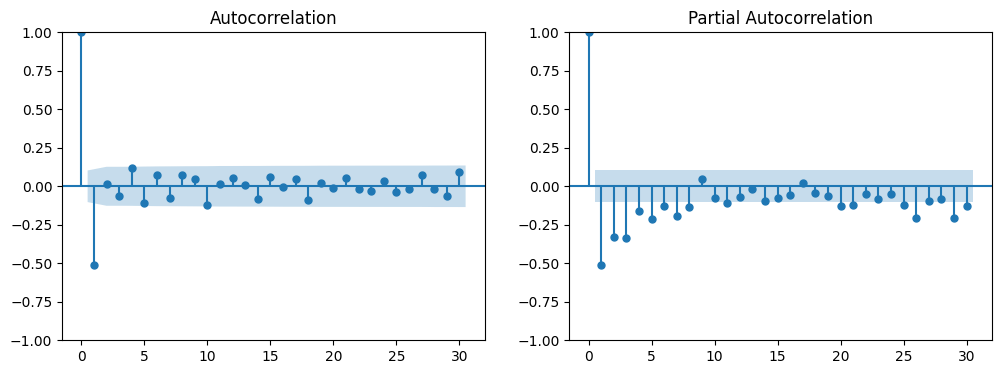

In [102]:
# ACF and PACF plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_reg.diff().dropna(), lags=30, ax=ax[0])
plot_pacf(df_reg.diff().dropna(), lags=30, ax=ax[1])
plt.show()

In [105]:
# Check if the data stationary or not
df_check_stat = adfuller(df_reg)
print('ADF Statistic: %f' % df_check_stat[0])
print('P-Value: %f' % df_check_stat[1])
for key, value in df_check_stat[4].items():
  print('Critical Values:')
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.448086
P-Value: 0.000000
Critical Values:
	1%: -3.448
Critical Values:
	5%: -2.870
Critical Values:
	10%: -2.571


Berdasarkan analisis menggunakan adfuller, maka dapat dilihat bahwa ADF statistics < Critical values dan P value < 0.05, maka data tersebut sudah stationary dan bisa digunakan untuk ARIMA model.

### Modeling

In [94]:
# Split Data Train & Data Test
df_train = df_reg.iloc[:-31]
df_test = df_reg.iloc[-31:]

print(df_train.shape, df_test.shape)

(334, 1) (31, 1)


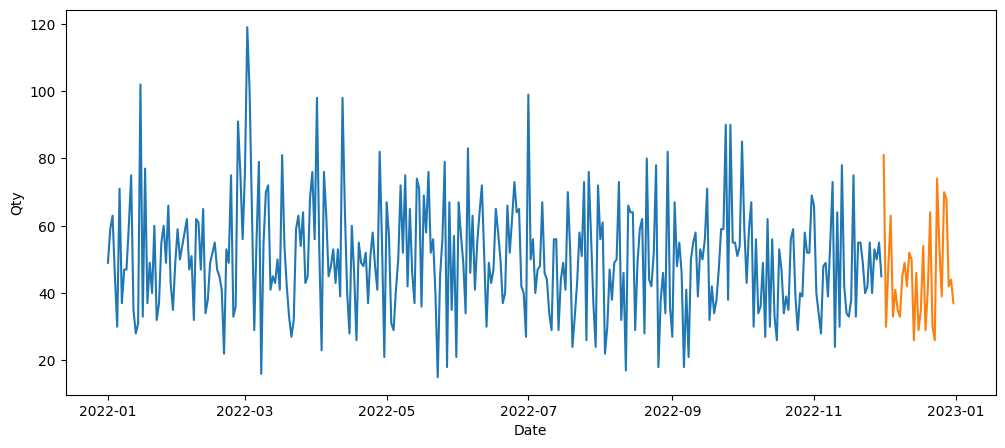

In [98]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_train, x=df_train.index, y=df_train['Qty'])
sns.lineplot(data=df_test, x=df_test.index, y=df_test['Qty'])
plt.show()

In [117]:
# check which ARIMA models best suit using auto ARIMA
import pmdarima as pm
from pmdarima import auto_arima

auto_arima_model = auto_arima(df_train['Qty'], seasonal=False, stepwise=False, suppress_warnings=True, trace = True)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3067.753, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2969.103, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2939.868, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2897.396, Time=0.09 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1432.364
Date:                Sat, 30 Sep 2023   AIC                           2878.729
Time:                        14:32:35   BIC                           2905.386
Sample:                    01-01-2022   HQIC                          2889.358
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0361      1.012     -0.036      0.972      -2.020       1.948
ar.L1         -0.8641      0.056    -15.420      0.000      -0.974      -0.754
ar.L2         -0.7198      0.068    -10.629      0.000      -0.852      -0.587
ar.L3         -0.6062      0.064     -9.450      0.000      -0.732      -0.480
ar.L4         -0.3322      0.059     -5.629      0.000      -0.448      -0.217
ar.L5         -0.1927      0.053     -3.668      0.000      -0.296      -0.090
sigma2       317.7588     24.003     13.238      0.000     270.714     364.804
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 4.88
Prob(Q):                              0.59   Prob(JB):                         0.09
Heteroskedasticity (H):               0.76   Skew:                             0.22
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Berdasarkan auto ARIMA, model yang terbaik adalah dengan order (5, 1, 0).

In [213]:
# function to calculate RMSE
def rmse(y_actual, y_pred):
  print(f'RMSE value {mean_squared_error(y_actual, y_pred)**0.5}')

# function to eval machine learning modeling
def eval(y_actual, y_pred):
  print(f'MAE value {mean_absolute_error(y_actual, y_pred)}')

In [214]:
# fit the ARIMA model
y = df_train['Qty']
model = ARIMA(y, order = (5, 1, 0))
model = model.fit()

In [215]:
# model prediction
pred = model.get_forecast(len(df_test))
pred_df = pred.conf_int()
pred_df['predictions'] = model.predict(start = pred_df.index[0], end = pred_df.index[-1])
pred_df.index = df_test.index
df_forecast = pred_df['predictions']

In [216]:
# evaluate the model
rmse(df_test['Qty'], df_forecast)
eval(df_test['Qty'], df_forecast)

RMSE value 15.053042796224247
MAE value 12.75512678528398


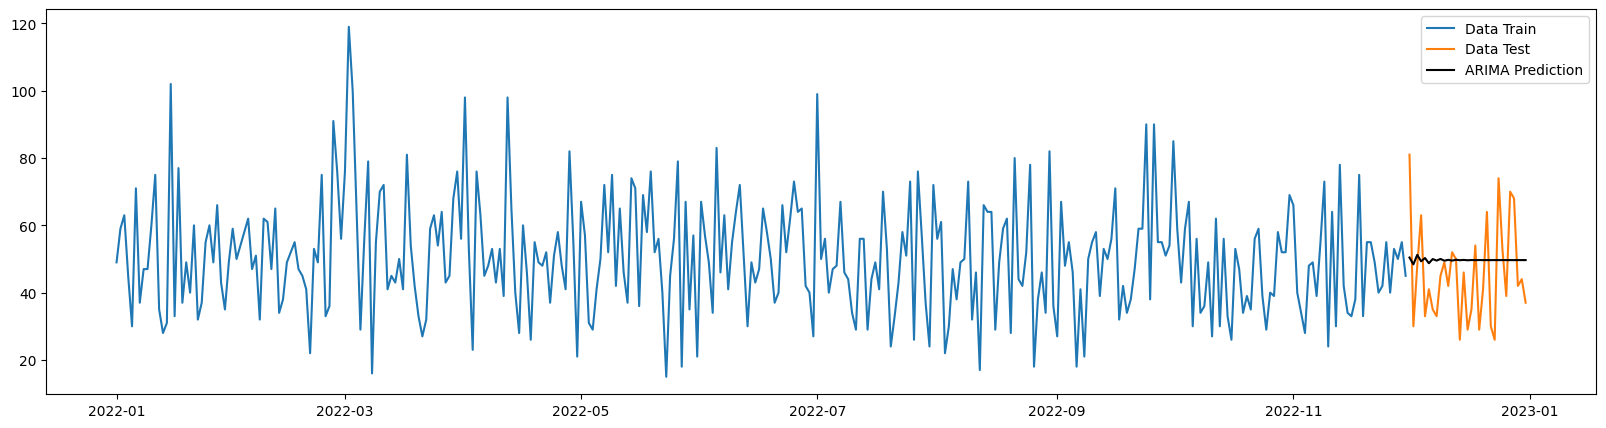

In [217]:
# plot
plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'], label='Data Train')
plt.plot(df_test['Qty'], label='Data Test')
plt.plot(df_forecast, color='black', label='ARIMA Prediction')
plt.legend()

In [203]:
df_forecast.mean().round(0)

50.0

Berdasarkan analisis yang dilakukan, maka dapat diprediksi bahwa jumlah produk yang terjual bulan Desember 2022 adalah 50 produk per hari (lebih 5 produk dari data actual/data test).

### Forecasting Each Product Quantity

In [222]:
# forecast for next month for each product
list_product = df_merge['Product Name'].unique()

# create dataframe for forecast
df_result = pd.DataFrame({'Date':pd.date_range(start='2023-01-01', end='2023-01-31')})
df_result = df_result.set_index('Date')
for i in list_product:
    df1 = df_merge[['Date','Product Name','Qty']]
    df1 = df1[df1['Product Name']==i]
    df1= df1.groupby('Date')[['Qty']].sum()
    df1 = df1.reset_index()

    df2 = pd.DataFrame({'Date':pd.date_range(start='2022-01-01', end='2022-12-31')})
    df2 = df2.merge(df1, how='left', on='Date')
    df2 = df2.fillna(0)
    df2 = df2.set_index('Date')

    model1 = ARIMA(df2, order=(5, 1, 0))
    model_fit1 = model1.fit()
    forecast1 = model_fit1.forecast(steps=31)
    df_result[i] = forecast1.values
    
df_result.head()

,Crackers,Yoghurt,Choco Bar,Cheese Stick,Oat,Thai Tea,Coffee Candy,Potato Chip,Ginger Candy,Cashew
Date,,,,,,,,,,
2023-01-01,6.106235,3.830957,5.023622,6.701247,2.643269,4.672604,6.708973,3.624533,7.841138,1.820271
2023-01-02,5.634547,4.280938,6.096409,7.967038,3.249200,4.792271,6.570339,1.761774,8.999709,2.050780
2023-01-03,5.230499,4.739068,5.936069,6.139172,2.876848,3.967512,6.519189,2.535615,7.374542,1.838230
2023-01-04,5.211875,4.547295,3.849957,6.653011,2.967520,4.957475,6.750441,3.141005,6.900365,1.770446
2023-01-05,4.899641,4.088417,5.129626,6.401178,2.926173,4.874770,7.808847,3.211266,6.950302,1.244804


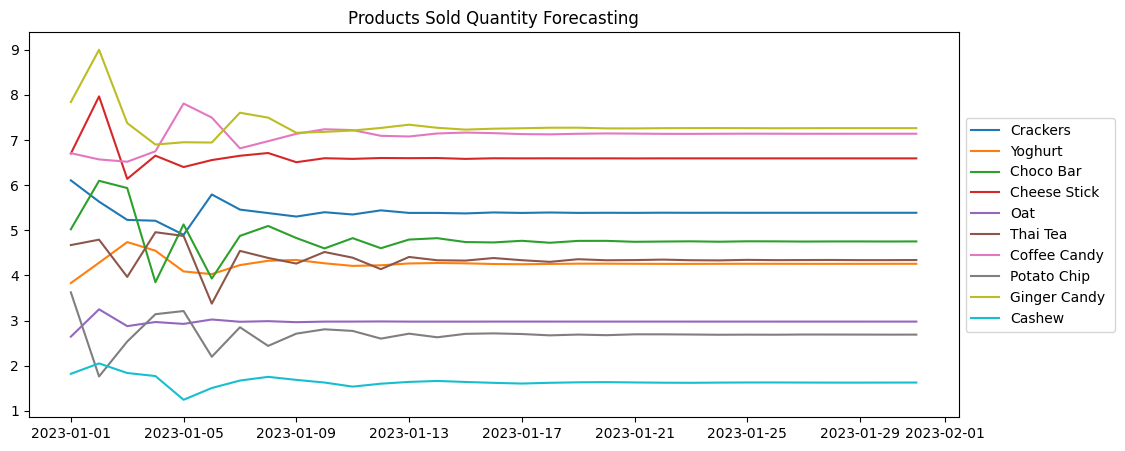

In [223]:
# plot forecasting each product
plt.figure(figsize=(12,5))
plt.plot(df_result)
plt.legend(df_result.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Products Sold Quantity Forecasting')
plt.show()

In [235]:
# get the average units sold for each product
avg_qty = df_result.mean().round(0)
print(avg_qty)

# sum of sold products
sum_qty = avg_qty.sum()
print('Jumlah barang yang terjual per harinya adalah', sum_qty)

Crackers         5.0
Yoghurt          4.0
Choco Bar        5.0
Cheese Stick     7.0
Oat              3.0
Thai Tea         4.0
Coffee Candy     7.0
Potato Chip      3.0
Ginger Candy     7.0
Cashew           2.0
dtype: float64
Jumlah barang yang terjual per harinya adalah 47.0


Berdasarkan model yang telah dibuat, maka dapat diprediksi jumlah barang yang akan terjual pada bulan Januari 2023 adalah 47 unit.

## Clustering

In [236]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [237]:
# load dataset
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,44,1,Married,14.58
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,Choco Bar,8800,Gita Ginara,Gita,General Trade,-6.966667,110.416664,27,1,Single,0.18
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,Choco Bar,8800,Gita Ginara,Gita,General Trade,-6.966667,110.416664,48,1,Married,12.57
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,Yoghurt,10000,Gita Ginara,Gita,General Trade,-6.966667,110.416664,33,0,Married,6.95


In [238]:
# aggregate data
agg = {'TransactionID': 'count',
       'Qty': 'sum',
       'TotalAmount': 'sum'}
df_cluster = df_merge.groupby('CustomerID').aggregate(agg).reset_index()
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [240]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_cluster[['TransactionID', 'Qty', 'TotalAmount']])
df_scale = pd.DataFrame(df_scale, columns=['TransactionID', 'Qty', 'TotalAmount'])
df_scale.head()

,TransactionID,Qty,TotalAmount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347


Elbow Method

1341.0000000000002
543.2539723846328
316.9717123222516
238.55313216419245
192.16713152981617
169.89268605848886
153.84402218646662


<Axes: title={'center': 'Elbow Method'}, xlabel='Jumlah Cluster', ylabel='Inertia'>

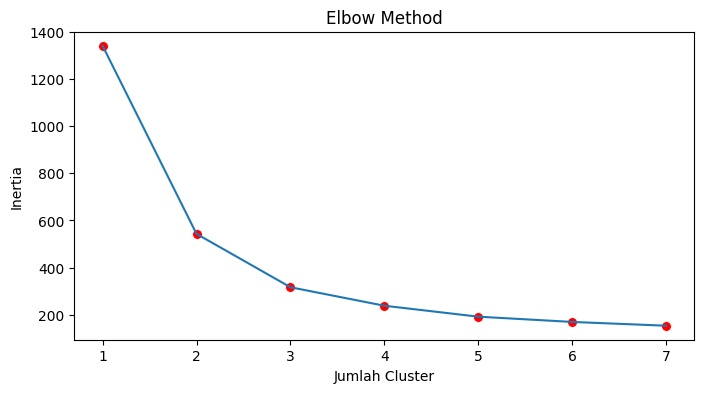

In [241]:
X = df_scale.copy()
inertia = []

for i in range(1,8):
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(X)
    print(km.inertia_)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
sns.lineplot(x=np.arange(1,8), y=inertia)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
sns.scatterplot(x=range(1,8), y=inertia, s=50, color='red')

KMeans

In [243]:
# create cluster
n_cluster = 3
kmeans = KMeans(n_clusters=3, random_state=23, n_init=n_cluster)
kmeans.fit(df_cluster.drop('CustomerID', axis=1))
df_cluster['Cluster'] = kmeans.labels_

Text(0.5, 1.0, 'PCA 2D Visualization')

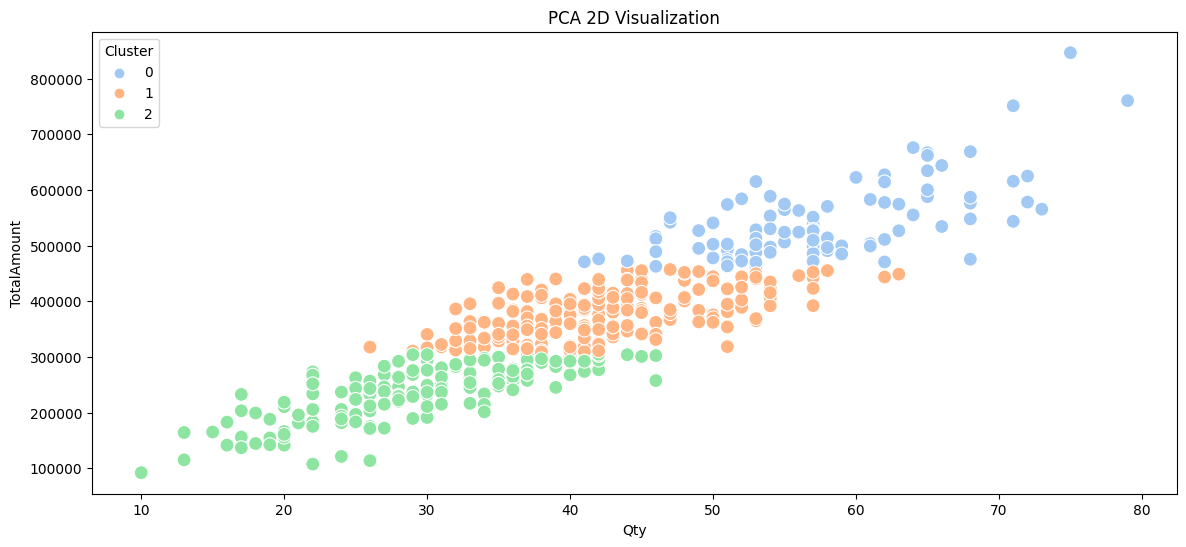

In [252]:
# plot cluster
fig,ax = plt.subplots(figsize=(14,6))
sns.scatterplot(x='Qty', y='TotalAmount', hue='Cluster', data=df_cluster, palette='pastel', s=100)
plt.title('PCA 2D Visualization')

Berdasarkan Elbow Method, maka dapat disimpulkan bahwa jumlah cluster yang optimal adalah 3.

### Interpretasi Hasil

In [330]:
df_cluster.sample(5)

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
129,130,10,36,314400,1
355,356,16,57,526900,0
115,116,11,39,383800,1
203,204,12,40,382400,1
289,290,6,22,175400,2


<Figure size 1500x700 with 0 Axes>

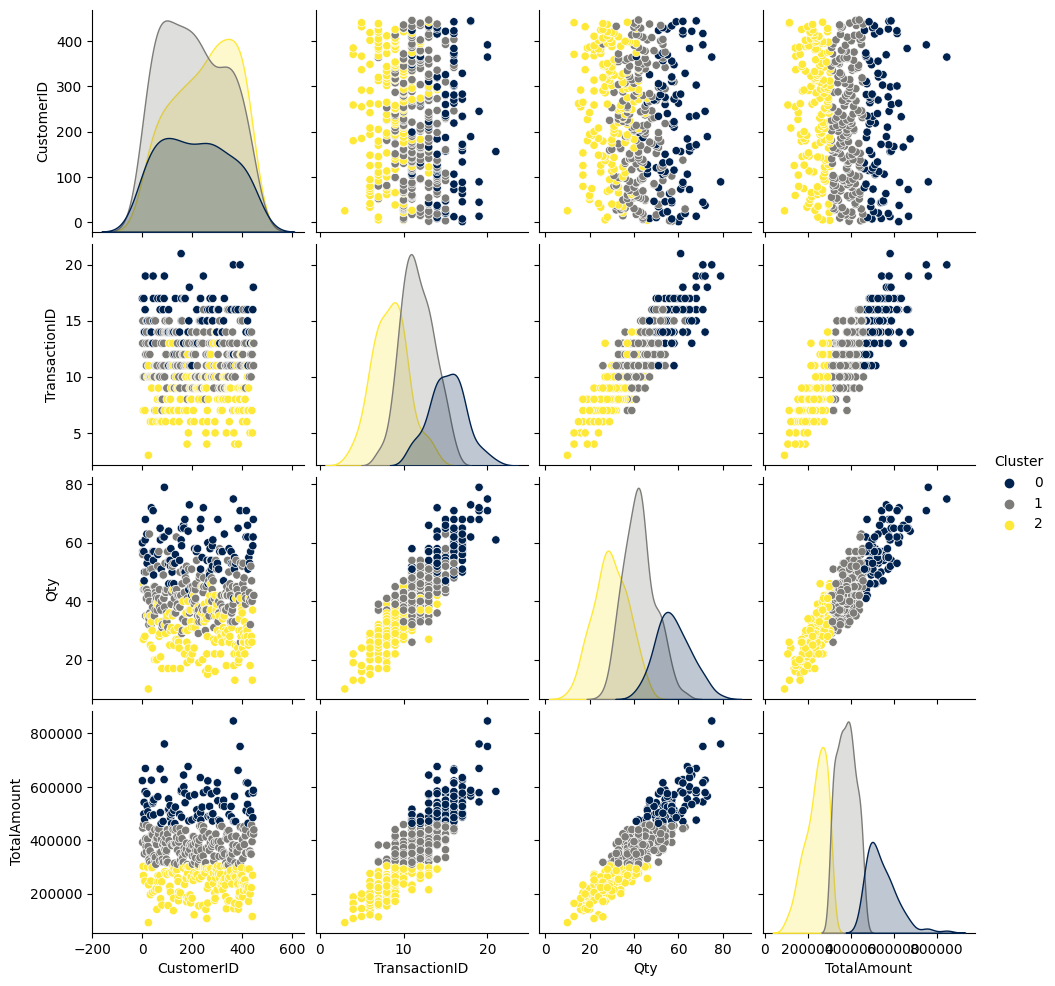

In [329]:
plt.figure(figsize=(15,7))
sns.pairplot(data=df_cluster, hue='Cluster', palette='cividis')
plt.show()

In [258]:
# menghitung jumlah customer per cluster
df_cust = df_cluster.groupby('Cluster').agg({'CustomerID':'count'}).reset_index()
df_cust.columns = ['Cluster','Total Customer']
df_cust['Percentage'] = round((df_cust['Total Customer']/df_cust['Total Customer'].sum())*100,0)
df_cust

,Cluster,Total Customer,Percentage
0,0,94,21.0
1,1,191,43.0
2,2,162,36.0


In [338]:
df_cluster_group = df_cluster.groupby('Cluster').agg({'Qty' : 'mean',
                                                      'TotalAmount' : 'mean',
                                                      'TransactionID' : 'mean'
                                                      }).reset_index()

df_cluster_group.rename(columns={'TransactionID': 'TotalTransaction'}, inplace=True)
df_cluster_group

round(df_cluster_group,0)

,Cluster,Qty,TotalAmount,TotalTransaction
0,0,58.0,544541.0,15.0
1,1,42.0,378895.0,12.0
2,2,30.0,237575.0,8.0


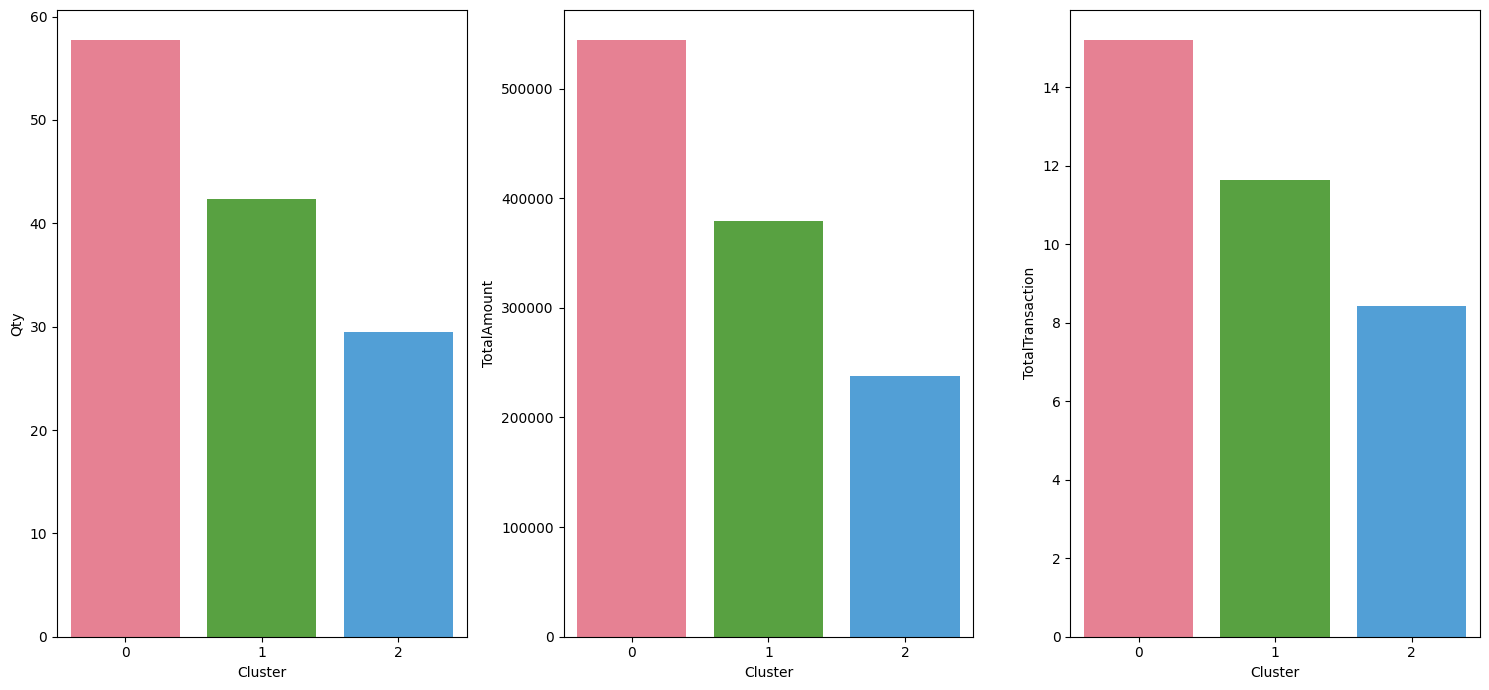

In [339]:
kolom = ['Qty','TotalAmount','TotalTransaction']

plt.figure(figsize=(15,7))
for i in range(len(kolom)):
    plt.subplot(1,3,i+1)
    sns.barplot(data=df_cluster_group, x='Cluster', y=kolom[i], palette='husl')
plt.tight_layout()

**Hasil Interpretasi:**

Berdasarkan cluster yang ada, maka dapat dikategorikan bahwa:
- Cluster 0 merupakan High Spender (sebanyak 94 customer atau 21%).
- Cluster 1 merupakan Mid Spender (sebanyak 191 customer atau 43%).
- Cluster 2 merupakan Low Spender (sebanyak 162 customer atau 36%).

**Karakteristik Cluster:**
- Cluster 0: Pelanggan dengan jumlah transaksi dan total belanja yang paling tinggi.
- Cluster 1: Pelanggan dengan jumlah transaksi dan total belanja yang menengah.
- Cluster 2: Pelanggan dengan jumlah transaksi dan total belanja yang paling rendah.

**Rekomendasi Bisnis:**
- Cluster 0:
    - Memberikan bonus loyalti, bisa berupa merchandise atau diskon.
    - Memberikan penawaran harga khusus atau akses awal untuk mencoba produk terbaru.
    - Memperhatikan kritik dan saran yang diberikan, agar pelanggan tetap loyal.
- Cluster 1:
    - Memberikan penawaran bonus loyalti.
    - Menawarkan bundling produk agar pelanggan dapat menaikkan jumlah transaksi.
    - Memberikan rekomendasi produk berdasarkan produk yang paling sering dibeli.
- Cluster 2:
    - Memberikan promo khusus pada produk yang sering dibeli atau produk yang terakhir dibeli.
    - Menawarkan bundling produk.
    - Membangun hubungan kepada pelanggan dengan memberikan survey layanan dan produk melalui email atau telepon.
